In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pyart
import matplotlib.pyplot as plt

%matplotlib inline

/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/pyart/map/grid_mapper.py:40: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  from .ball_tree import BallTree


In [2]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [3]:
radar0 = pyart.io.read("data/KICX20150914_221837_V06.gz")
radar1 = pyart.io.read("data/KICX20150914_222306_V06.gz")

In [4]:
ds = xr.open_dataset("data/2015_09_14.nc")

In [5]:
def plot_base_scan(radar, sweep, field, ax, cbar=False, title='time', **kwargs):
    base_time = pd.Timestamp(radar.time['units'].split()[2])
    sweep_time = pd.Timedelta(seconds=radar.time['data'][(radar.get_start(sweep)+
                                                          radar.get_end(sweep))/2])+base_time

    ds0 = ds.where((ds.cloud_ground == b'G') &
                   ((sweep_time-pd.Timedelta(minutes=1)).asm8<ds.time) &
                   (ds.time<(sweep_time+pd.Timedelta(minutes=1)).asm8) &
                   (min_lat<ds.lat) & (ds.lat<max_lat) &
                   (min_lon<ds.lon) & (ds.lon<max_lon)
                  ).dropna('record')
    extents.update(kwargs)
    if title=='time':
        title=sweep_time.round('s')
    elif title=='field':
        title=field
    display_map = pyart.graph.RadarMapDisplay(radar)
    display_map.plot_ppi_map(field, sweep, title=title, colorbar_flag=False,
                             ax=ax, resolution='l', **extents)
    display_map.plot_point(ds0.lon.values, ds0.lat.values, symbol='w+', ms=10, mew=2)
    if cbar:
        fig.colorbar(display_map.plots[-1], ax=ax)

In [6]:
min_lat=36.85
max_lat=37.06
min_lon=-113.2
max_lon=-112.8
extents = dict(min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon)

/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


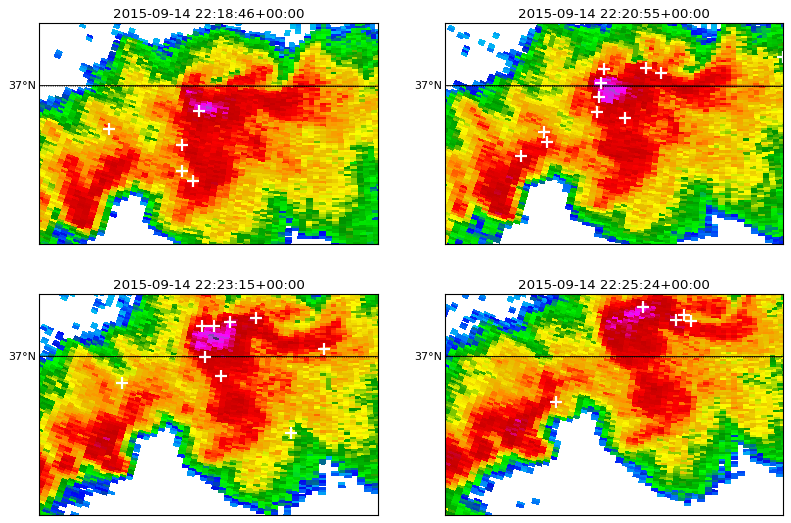

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
    
plot_base_scan(radar0, 0, 'reflectivity', axes[0,0], vmin=-8, vmax=75)
plot_base_scan(radar0, 8, 'reflectivity', axes[0,1], vmin=-8, vmax=75)
plot_base_scan(radar1, 0, 'reflectivity', axes[1,0], vmin=-8, vmax=75)
plot_base_scan(radar1, 8, 'reflectivity', axes[1,1], vmin=-8, vmax=75)

plt.savefig('./Figures/Fig 1. Base scan reflectivity with CG flashes.png')

In [8]:
min_lat=36.95
max_lat=37.06
min_lon=-113.1
max_lon=-112.9
extents = dict(min_lat=min_lat, max_lat=max_lat, min_lon=min_lon, max_lon=max_lon)

/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


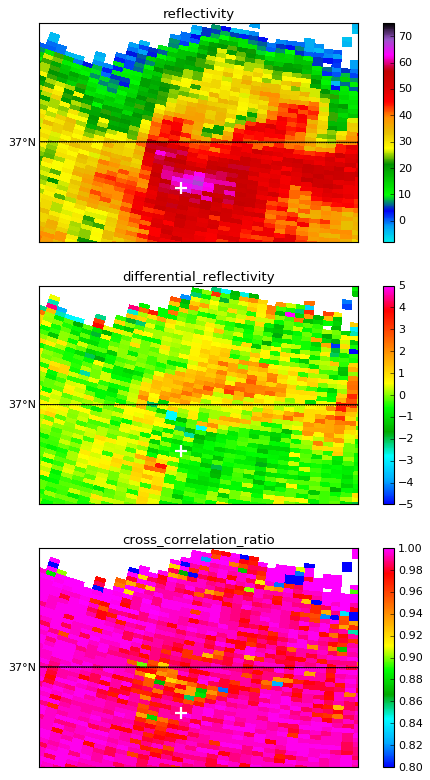

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
plot_base_scan(radar0, 0, 'reflectivity', axes[0], 
               title='field', cbar=True, vmin=-8, vmax=75)
plot_base_scan(radar0, 0, 'differential_reflectivity', axes[1], 
               title='field', cbar=True, vmin=-5, vmax=5)
plot_base_scan(radar0, 0, 'cross_correlation_ratio', axes[2], 
               title='field', cbar=True, vmin=0.8, vmax=1)
plt.savefig('./Figures/Fig 2. UTC 22:18 with CG flashes.png')

/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


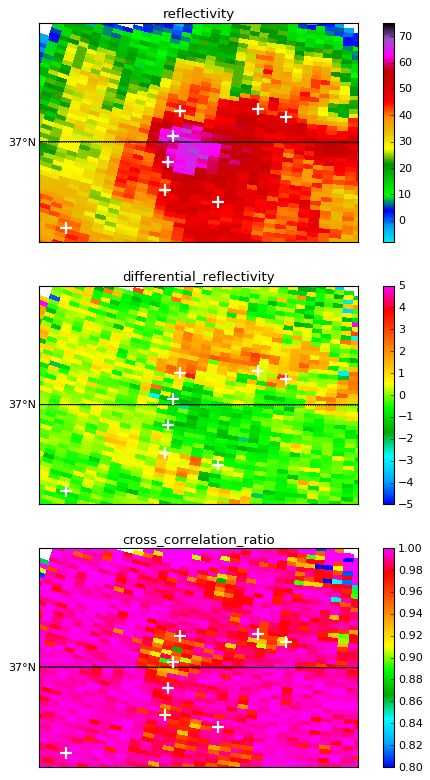

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
plot_base_scan(radar0, 8, 'reflectivity', axes[0], 
               title='field', cbar=True, vmin=-8, vmax=75)
plot_base_scan(radar0, 8, 'differential_reflectivity', axes[1], 
               title='field', cbar=True, vmin=-5, vmax=5)
plot_base_scan(radar0, 8, 'cross_correlation_ratio', axes[2], 
               title='field', cbar=True, vmin=0.8, vmax=1)
plt.savefig('./Figures/Fig 3. UTC 22:20 with CG flashes.png')

/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


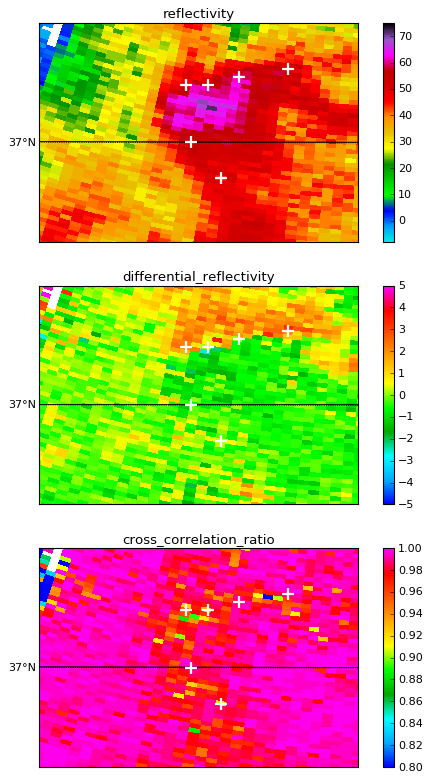

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
plot_base_scan(radar1, 0, 'reflectivity', axes[0], 
               title='field', cbar=True, vmin=-8, vmax=75)
plot_base_scan(radar1, 0, 'differential_reflectivity', axes[1], 
               title='field', cbar=True, vmin=-5, vmax=5)
plot_base_scan(radar1, 0, 'cross_correlation_ratio', axes[2], 
               title='field', cbar=True, vmin=0.8, vmax=1)
plt.savefig('./Figures/Fig 4. UTC 22:23 with CG flashes.png')

/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jsignell/miniconda2/envs/ShortCreekFlood_test/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


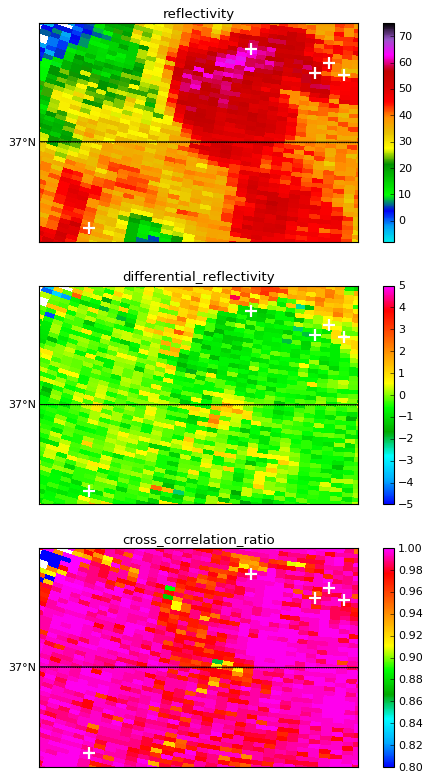

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
plot_base_scan(radar1, 8, 'reflectivity', axes[0], 
               title='field', cbar=True, vmin=-8, vmax=75)
plot_base_scan(radar1, 8, 'differential_reflectivity', axes[1], 
               title='field', cbar=True, vmin=-5, vmax=5)
plot_base_scan(radar1, 8, 'cross_correlation_ratio', axes[2], 
               title='field', cbar=True, vmin=0.8, vmax=1)
plt.savefig('./Figures/Fig 5. UTC 22:25 with CG flashes.png')